# Rain prediction in Australia


<img src="../images/1786.webp" height=500 width=700>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# 1. Load data

In [4]:
df = pd.read_csv('../data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

**Check how balanced the data is for the target column**

In [7]:
df.RainTomorrow.value_counts() 

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [7]:
df_No = df[df.RainTomorrow=='No'].sample(frac=1,random_state=0)
print("df_Nodf_No.shape=",df_No.shape)


df_Nodf_No.shape= (110316, 23)


In [8]:
df_Yes = df[df.RainTomorrow=='Yes']
print("df_Yes shape =",df_Yes.shape)
df_Yes.head()

df_Yes shape = (31877, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
10,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
11,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
12,2008-12-13,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
16,2008-12-17,Albury,14.1,20.9,0.0,NaN,NaN,ENE,22.0,SSW,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes


In [9]:
df_No = df_No.iloc[:df_Yes.shape[0],:]
df_No.shape

(31877, 23)

In [10]:
df_balanced = pd.concat([df_No, df_Yes])
df_balanced.shape
df = df_balanced
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
61095,2017-03-31,Bendigo,4.8,20.1,0.0,NaN,NaN,SSE,31.0,SW,...,75.0,35.0,1021.9,1018.6,NaN,NaN,10.0,18.2,No,No
111449,2017-01-15,Albany,17.0,22.7,0.0,NaN,NaN,NaN,NaN,SW,...,83.0,NaN,1009.3,1007.5,1.0,NaN,20.0,NaN,No,No
87084,2017-03-02,Brisbane,22.1,32.1,0.4,8.2,9.2,NE,22.0,S,...,62.0,56.0,1015.5,1011.8,4.0,5.0,28.2,29.6,No,No
64217,2009-01-27,MelbourneAirport,14.9,36.0,0.0,7.6,12.3,N,37.0,NNE,...,71.0,22.0,1017.8,1014.0,1.0,1.0,19.1,34.2,No,No
105224,2016-07-23,Nuriootpa,7.1,11.7,8.8,3.6,5.3,W,72.0,SW,...,93.0,57.0,1014.3,1015.0,6.0,NaN,8.5,10.4,Yes,No


**Now we will deal with the null values**

# 2. Data preprocessing

In [8]:
zeros_cnt = df.isnull().sum().sort_values(ascending=False)
percent_zeros = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([zeros_cnt, percent_zeros], axis=1, keys=['Total', 'Percent'])
missing_data
#missing_data.T

,Total,Percent
Sunshine,69835,0.480098
Evaporation,62790,0.431665
Cloud3pm,59358,0.408071
Cloud9am,55888,0.384216
Pressure9am,15065,0.103568
Pressure3pm,15028,0.103314
WindDir9am,10566,0.072639
WindGustDir,10326,0.070989
WindGustSpeed,10263,0.070555
Humidity3pm,4507,0.030984


**Let's drop those features where the missing/total coefficient is higher than 15%.**

In [9]:
dropList = list(missing_data[missing_data['Percent'] > 0.15].index)
dropList
df.drop(dropList, axis=1, inplace=True)

In [10]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [11]:
#df.head()
df.shape

(145460, 19)

**A pairplot helps visualize dependencies and correlation between features. Some of them have quite obvious links.**

In [12]:
#sns.pairplot(df[:1000])

**Comments on the pairplots: There are few linear relations with high values of the r pearson coefficient.**

***
**Take the month out of the Date and move it to its own cell**

In [13]:
df['Month'] = df.Date.apply(lambda x : int(x.split('-')[1]))

In [14]:
df.drop(['Date'], axis=1, inplace=True) # drop the Date column
#df.drop(['Location'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null object
RainTomorrow     142193 non-null object
Month            145460 non-null int64
dtypes: float64(12), int64(1), object(6)
memory usage: 21.1+ MB


**Let's encode categorical features using one-hot-encoding.**

In [16]:
ohe = pd.get_dummies(data=df, columns=['WindGustDir','WindDir9am','WindDir3pm','Location'],drop_first=True)
ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 108 entries, MinTemp to Location_Woomera
dtypes: float64(12), int64(1), object(2), uint8(93)
memory usage: 29.5+ MB


In [17]:
from sklearn import preprocessing
from numpy import array

ohe['RainToday'] = df['RainToday'].astype(str)
ohe['RainTomorrow'] = df['RainTomorrow'].astype(str)

lb = preprocessing.LabelBinarizer()

ohe['RainToday'] = lb.fit_transform(ohe['RainToday'])
ohe['RainTomorrow'] = lb.fit_transform(ohe['RainTomorrow'])

**Drop missing values and create target column y and data X**

In [18]:
ohe = ohe.dropna()
#ohe.drop('Location', axis=1, inplace=True)
y = ohe['RainTomorrow']
X = ohe.drop(['RainTomorrow'], axis=1)

# 3. Model building

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split the data into train/test datasets
X_t,X_v,y_t,y_v = train_test_split(X_train, y_train, test_size=0.2,random_state=0) 
allValues = (X_t,X_v,y_t,y_v)

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [53]:
X_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33981 entries, 114549 to 59997
Columns: 107 entries, MinTemp to Location_Woomera
dtypes: float64(12), int64(2), uint8(93)
memory usage: 6.9 MB


In [54]:
def assessClassifier(clf,allValues):
    name = str(clf)
    X_train,X_test,y_train,y_test = allValues
    pipe = Pipeline([('scaler', StandardScaler()), (name, clf)])
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    return {'name':name,'f1':f1, 'precision':precision,'recall':recall}

In [55]:
clf_Logistic = LogisticRegression()
clf_Forest = RandomForestClassifier()
clf_KNN = KNeighborsClassifier()
clf_SVC = SVC()
clf_XGBoost = XGBClassifier()
clf_NaiveB = GaussianNB()

NameError: name 'LogisticRegression' is not defined

In [56]:
details = {'name':[],'f1':[],'precision':[],'recall':[]}
for clf in [clf_Logistic, clf_Forest, clf_KNN,clf_SVC, clf_XGBoost, clf_NaiveB]:#clf_Logistic, clf_Forest,
    results = assessClassifier(clf, allValues)
    for item in results.keys():
        details[item].append(results[item])

NameError: name 'clf_Logistic' is not defined

In [57]:
df = pd.DataFrame(details)
df

,name,f1,precision,recall


***
**Testing grounds END**
***

***
***Support Vector Machines Tuneup***
***

In [58]:
scaler = StandardScaler()
X_t = scaler.fit_transform(X_t)
X_v = scaler.transform(X_v)
X_train = scaler.transform(X_train)

In [37]:
# Tunning Support Vector Machines
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=3)
  
# fitting the model for grid search
grid.fit(X_t, y_t)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.508, total= 3.6min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.6min remaining:    0.0s
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.508, total= 3.6min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.2min remaining:    0.0s
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.508, total= 3.6min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.508, total= 3.8min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.508, to

In [1]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

NameError: name 'grid' is not defined

***
**RandomForestClassifier Tuning**
***

In [3]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto'],
    'max_depth' : [4,5,8,10],
    'criterion' :['gini', 'entropy']
}


cv_RFC = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=3)
cv_RFC.fit(X_train, y_train)

NameError: name 'RFC' is not defined

In [ ]:
cv_RFC.best_params_
#sorted(zip(cv_RFC.best_estimator_.feature_importances_,ohe.columns))

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('RFC', RandomForestClassifier(criterion='gini', 
                                                                              max_depth=10, 
                                                                              max_features='auto',
                                                                              n_estimators=200))])

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('Log', LogisticRegression())])

In [ ]:
pipe.fit(X_train, y_train)


***
**END OF RANDOM FOREST TUNING**
***

***
**XGBoost Tuning**
***

In [27]:
clf_XGB = XGBClassifier(
    objective='binary:logistic',
    nthread = 4,
    seed = 42
)

In [28]:
parameters = {
    'max_depth':range(2,10,1),
    'n_estimators': range(60,220,40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [29]:
grid_search = GridSearchCV(
    estimator=clf_XGB,
    param_grid=parameters,
    scoring='roc_auc',
    n_jobs=10,
    cv=10,
    verbose=True
)

In [30]:
grid_search.fit(X_t,y_t)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   34.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  6.3min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed: 20.0min
/usr/lib/python3/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed: 39.3min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed: 52.3min finished
/home/kostrovy/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier obje

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_esti...
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=42, subsample=None, tree_method=None,
                                     use_label_encoder=True,
                                     validate_parameters=None, ve

In [32]:
clf_XGB_optimized = grid_search.best_estimator_

In [33]:
clf_XGB_optimized.fit(X_t,y_t)

/home/kostrovy/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[11:42:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [84]:
pipe = Pipeline([('scaler', StandardScaler()), ('RFC', XGBClassifier(
                base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=0.1, max_delta_step=0, max_depth=8,
                min_child_weight=1, monotone_constraints='()',
                n_estimators=180, n_jobs=4, nthread=4, num_parallel_tree=1,
                random_state=42, reg_alpha=0,
                reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
                tree_method='exact', use_label_encoder=True,
                validate_parameters=1, verbosity=None))])

In [85]:
pipe.fit(X_train, y_train)

/home/kostrovy/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[12:24:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RFC',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=8,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=180,
                               n_jobs=4, nthread=4, num_parallel_tree=1,
                               objective='binary:logistic', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=42, subsample=1, tree_method='exact',
      

In [86]:
pipe.score(X_train, y_train)

0.9061409702608406

In [87]:
pipe.score(X_test,y_test)

0.8616521991942517

***
**END OF XGBOOST TUNING**
***

***
**LogisticRegression Tuneap**
***

In [22]:
pipe = Pipeline([('classifier' , LogisticRegression(max_iter=2000))])
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search.fit(X_t , y_t)
LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l1, solver=lbfgs ...................
[CV]  C=0.1, max_iter=600, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l1, solver=lbfgs ...................
[CV]  C=0.1, max_iter=600, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l1, solver=liblinear ...............
/usr/lib/python3/dist-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[CV]  C=0.1, max_iter=600, penalty=l1, solver=liblinear, score=0.843, total=24.4min
[CV] C=0.1, max_iter=600, penalty=l1, solver=liblinear ...............
/usr/lib/python3/dist-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[CV]  C=0.1, max_iter=6

In [49]:
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_t, y_t)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed: 26.3min
/usr/lib/python3/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 37.0min finished


In [28]:
best_clf.best_estimator_

Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features=11,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=90, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [39]:
clf_Forest_tuned = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features=11,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=90, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False)

In [40]:
clf_Forest_tuned.fit(X_t,y_t)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=11,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
cross_val_score(clf_Forest_tuned, X_test, y_test, cv=5).mean()

0.8503552712833304

In [1]:
y_pred = clf_Forest_tuned.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#confusion_matrix(y_test, y_pred)
precision_score(y_test, y_pred)

NameError: name 'clf_Forest_tuned' is not defined

In [43]:
recall_score(y_test, y_pred)
precision_score(y_test, y_pred)
f1_score(y_test, y_pred)

0.9114543508181678

No Skill: ROC AUC=0.500
RFC: ROC AUC=0.881


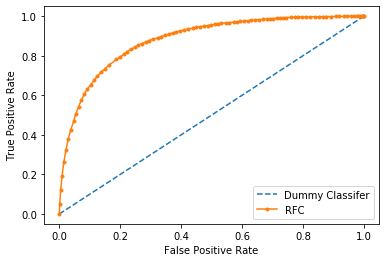

In [47]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = clf_Forest_tuned.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RFC: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer')
plt.plot(lr_fpr, lr_tpr, marker='.', label='RFC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# 4. Model evaluation

In [88]:
pipe.score(X_train, y_train)

0.9061409702608406

In [90]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_test, y_test, cv=5).mean()

/home/kostrovy/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[12:26:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
/home/kostrovy/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGB

0.8547994656096156

**Cross validation scores on the whole dataset:**

In [91]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=5).mean()

/home/kostrovy/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[12:26:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
/home/kostrovy/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGB

0.8092553413615671

In [92]:
y_pred = pipe.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.8616521991942517

In [99]:
from sklearn.metrics import precision_score, recall_score, f1_score

recall_score(y_test, y_pred)
precision_score(y_test, y_pred)
f1_score(y_test, y_pred)

0.9141516971212081

In [94]:
print(recall_score, precision_score, f1_score)

<function recall_score at 0x7f6a22656b80> <function precision_score at 0x7f6a22656af0> <function f1_score at 0x7f6a22656790>


# 5. Plotting precision-recall & ROC curves.

No Skill: ROC AUC=0.500
RFC: ROC AUC=0.893


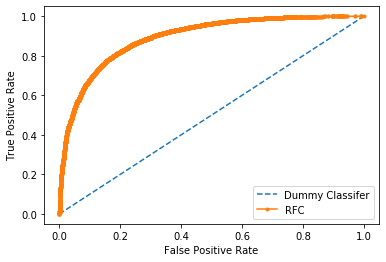

In [95]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = pipe.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RFC: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer')
plt.plot(lr_fpr, lr_tpr, marker='.', label='RFC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Let's plot a graph to identify the threshold influence on the scores**

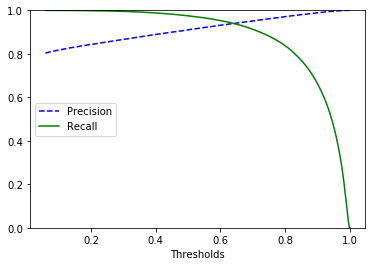

In [96]:
from sklearn.metrics import precision_recall_curve
y_scores = pipe.predict_proba(X_train)[:,1]
#y_scores

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_prc (precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Thresholds')
    plt.legend(loc='center left')
    plt.ylim([0,1])

plot_prc(precisions, recalls, thresholds)

In [97]:
#y_pred = clf.predict(X_test)  # default threshold is 0.5
y_pred1 = (pipe.predict_proba(X_test)[:,1] >= 0.7).astype(int) # set threshold as 0.3
precision_score(y_test, y_pred1)

0.920267085624509

**Here we can clearly see the balance between precision & recall. 
So if we want a higher recall, we can shift a threshold to a higher value.**

**However, you should decide on the threshold with a thorough analysis not to miss-out on the model performance later.**

# 6. Conclusion

**So, we have build a quite simple Random Forest Classifier using the features from dataset applying one-hot-encoding to the categorical features.**

**The accuracy-score for the out-of-the-box model is around 85% which is not bad. The AUC score is 0.862.**

**We have also conducted an experiment with shifting the decision boundary for the model which resulted in a precision score spike. This is the technique you can use to manually set the threshold for the trained classifier.**

***
**FROM THE BOOK**
***

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [51]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,max_samples=5000, bootstrap=True, n_jobs=-1, oob_score=True)

In [52]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [47]:
y_pred = bag_clf.predict(X_val)

In [48]:
bag_clf.oob_score_

0.8409370327296893

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_val,y_pred)

0.8428362573099415

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),n_estimators=200,
    algorithm='SAMME.R', learning_rate=0.5
)

In [38]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [40]:
y_pred = ada_clf.predict(X_val)

In [41]:
accuracy_score(y_val,y_pred)

0.8513423710792132

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [60]:
y2 = y_train- tree_reg1.predict(X_train)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X_train,y2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [61]:
y3 = y2 - tree_reg2.predict(X_train)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X_train,y3)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [81]:
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1,tree_reg2,tree_reg3))
y_pred = [tresh_hold(item) for item in y_pred]

In [82]:
precision_score(y_test,y_pred)

0.5013182674199623

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
X_train,X_val, y_train, y_val = train_test_split(X,y)

In [26]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
errors = [mean_squared_error(y_val,y_pred) for y_pred in gbrt.staged_predict(X_val)]

In [28]:
bst_n_estimators  = np.argmin(errors) + 1 

In [29]:
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
y_pred = gbrt_best.predict(X_val)

In [31]:
def tresh_hold(y, tresh=0.5):
    if y < tresh:
        return 0
    else:
        return 1

In [32]:
y_round = [tresh_hold(item) for item in y_pred]

In [35]:
accuracy_score(y_val,y_round)

0.8500132908027644

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [56]:
y_pred_rf = rnd_clf.predict(X_val)

In [57]:
accuracy_score(y_val, y_pred_rf)

0.8205409356725146

In [58]:
rnd_clf.feature_importances_

array([1.64803155e-02, 2.65592665e-02, 1.45984449e-01, 6.61593555e-02,
       6.49886196e-03, 6.63202376e-03, 8.70304994e-02, 3.19888358e-01,
       6.18153632e-02, 7.41551740e-02, 9.11374188e-03, 4.53799521e-02,
       1.12433655e-01, 1.46106506e-03, 1.29289786e-04, 7.19909279e-06,
       4.17157490e-04, 1.05633476e-04, 2.43967617e-05, 1.15548547e-04,
       2.63378988e-04, 0.00000000e+00, 4.06164721e-05, 2.30467776e-05,
       2.25834675e-05, 2.49611531e-05, 5.99143675e-05, 3.66341108e-04,
       0.00000000e+00, 4.86937037e-06, 5.03193682e-04, 3.52745617e-03,
       1.68200796e-05, 7.20160893e-04, 8.18383943e-04, 2.99826175e-05,
       3.62948686e-05, 4.32916514e-04, 9.58108188e-05, 9.06063788e-05,
       0.00000000e+00, 4.60456477e-06, 2.83987315e-05, 2.35911713e-05,
       1.90416077e-05, 1.64630844e-05, 5.53741933e-04, 1.39794002e-04,
       5.47634921e-05, 2.74591981e-04, 3.05617716e-04, 1.41451938e-05,
       9.76993950e-06, 2.99427555e-05, 2.33444565e-05, 1.09843160e-04,
      

In [60]:
sorted_features = sorted(rnd_clf.feature_importances_)
for name, score in zip(X.columns,rnd_clf.feature_importances_):
    print(name,score)

MinTemp 0.01648031550248523
MaxTemp 0.02655926653498452
Rainfall 0.14598444909089736
WindGustSpeed 0.06615935554632335
WindSpeed9am 0.006498861962296096
WindSpeed3pm 0.006632023757891833
Humidity9am 0.08703049935562579
Humidity3pm 0.31988835787066777
Pressure9am 0.06181536318430748
Pressure3pm 0.07415517398164707
Temp9am 0.009113741879814887
Temp3pm 0.04537995209083665
RainToday 0.11243365481417351
Month 0.0014610650576186526
WindGustDir_ENE 0.00012928978605689646
WindGustDir_ESE 7.1990927903121364e-06
WindGustDir_N 0.0004171574895115654
WindGustDir_NE 0.00010563347580812242
WindGustDir_NNE 2.439676172268475e-05
WindGustDir_NNW 0.00011554854661720401
WindGustDir_NW 0.0002633789879379555
WindGustDir_S 0.0
WindGustDir_SE 4.061647207478234e-05
WindGustDir_SSE 2.304677759462207e-05
WindGustDir_SSW 2.2583467487447645e-05
WindGustDir_SW 2.4961153131652466e-05
WindGustDir_W 5.991436754278331e-05
WindGustDir_WNW 0.00036634110774244204
WindGustDir_WSW 0.0
WindDir9am_ENE 4.869370372353022e-06
Wi

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [62]:
polynomial_svm_clf = Pipeline([
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10,loss='hinge'))
])

In [65]:
X_small = X_train[:1000]
y_small = y_train[:1000]

In [66]:
polynomial_svm_clf.fit(X_small,y_small)

/usr/lib/python3/dist-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [68]:
y_pred = polynomial_svm_clf.predict(X_val)

In [ ]:
#Tune up Random Forest
param_grid = [
    {'n_estimators':[3,10,30,50,], 'max_features':[2,4,6,8]},
   # {'n_estimators': [50, 60, 70,80,90,100,110],
    #'max_features': ['auto'],
    #'max_depth' : [5,10,20, 30, 40, 50 ,60 , 70],
    #'criterion' :['gini', 'entropy']},
    #{'bootstrap':[True],'n_estimators':[3,5,10,20],'max_features':['auto']},
]
grid_search_RandomForest = GridSearchCV(RandomForestClassifier(), param_grid, cv=cv, scoring=scoring,
                            return_train_score=True, verbose=1, n_jobs = -1)
grid_search_RandomForest.fit(X_train,y_train)
print_results(grid_search_RandomForest,X_train,y_train)
print_results(grid_search_RandomForest, X_val,y_val)
print_results(grid_search_RandomForest,X_test,y_test)
#Tune up SVC
Cs = [0.001, 0.01, 0.1 ,1, 10, 100, 1000, 10000]
#Cs = [0.001, 0.1 ,1, 100, 10000]
gammas = [0.00000001 ,0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1 , 1, 10, 100, 200, 300, 1000]
#gammas = [ 1,2,7,8,9,10,11,12,13]
param_grid = {'C':Cs, 'gamma':gammas }
grid_search_SVC = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=10, scoring='precision',verbose=1,n_jobs=-1)
grid_search_SVC.fit(X_train[:6000],y_train[:6000])

In [ ]:
***
## Now I will identify the threshold's influence on the scores
***
clf = random_forest
y_scores = clf.predict_proba(X_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

def plot_prc (precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Thresholds')
    plt.legend(loc='center left')
    plt.ylim([0,1])

plot_prc(precisions, recalls, thresholds)
y_pred1 = (clf.predict_proba(X_test)[:,1] >= 0.75).astype(int) # set threshold
print(precision_score(y_test, y_pred1))
print(f1_score(y_test,y_pred1))
from sklearn.metrics import precision_recall_curve
def plot_prc (precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Thresholds')
    plt.legend(loc='center left')
    plt.ylim([0,1])
rows = 2
cols = 2
figure, axis = plt.subplots(rows, cols)
# For Sine Function
classifiers = [(logistic,"Logistic Regression"), (random_forest, "Random Fores"), (xgboost, "XGBoost"), (svc,"Support Vector Machines")]
counter = 0
for r in range(rows):
    for c in range(cols):
        clf, name  = classifiers[counter]
        y_scores = clf.predict_proba(X_test)[:,1]
        precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
        axis[r, c].plot(X, Y1)
        axis[r, c].set_title(name)
        counter += 1